In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
# Read the data as data type float32 as the csv file is very large

data = pd.read_csv("A_Z Handwritten Data.csv").astype("float32")
data.head(10)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# split the data into X and y
# X will contain a character image and y will contain a label of that image

X = data.drop("0", axis= 1)
y = data["0"]

In [4]:
# Perform train_test_split on X and y, to get training (x_train, y_train) and testing (x_test, y_test) data.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .2)

In [5]:
# Reshape the training and testing image data using numpy to display it inthe form of image.
# Context: In the csv file images are present in 784 columns of pixel data We need to convert them to 28 x 28 pixels.

x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print("Training data shape:", x_train.shape)
print("Testing data shape: ", x_test.shape)


Training data shape: (297960, 28, 28)
Testing data shape:  (74490, 28, 28)


In [6]:
# shuffle the training data so that we can see training on shuffled characters

shuffled_data = shuffle(x_train)

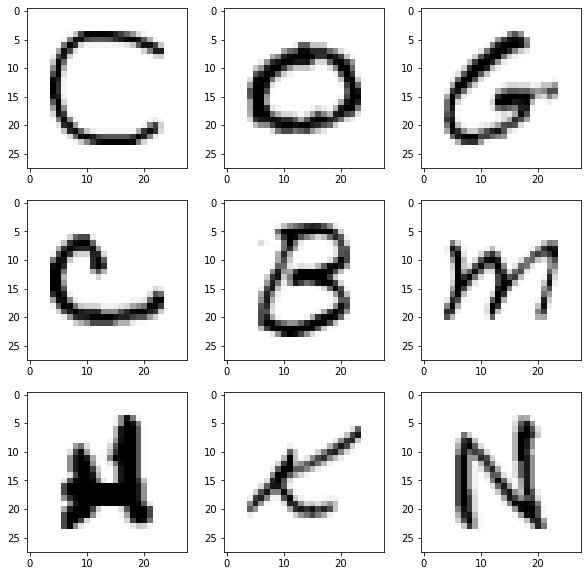

In [7]:
# Visualize training data, check if conversion to image form worked.
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuffled_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffled_data[i], (28,28)), cmap="Greys")
plt.show()


In [8]:
# Reshape data to train the model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [9]:
# convert float values to categorical values
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

In [10]:
# Import dependencies to create a Convolutional Neural Networks (CNN) model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

The model we have created consist of :

- 3 convolutional layers(Conv2D) of 64,64,64 layers each, followed by MaxPool layers that are used to reduce the number of features extracted.
- And after flatten the layers, we created two fully connected layers (Dense layer) of 128,265 layers respectively,
- and at last we have created our output layer that is also a fully connected layer with softmax as an activation function.

In [11]:
model = Sequential()
 
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

2022-06-13 20:08:25.424793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [13]:
# Compile and fit the model
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
9312/9312 [==============================] - 542s 58ms/step - loss: 0.2273 - accuracy: 0.9352 - val_loss: 0.1462 - val_accuracy: 0.9597
Epoch 2/5
9312/9312 [==============================] - 496s 53ms/step - loss: 0.1154 - accuracy: 0.9676 - val_loss: 0.1030 - val_accuracy: 0.9714
Epoch 3/5
9312/9312 [==============================] - 509s 55ms/step - loss: 0.0986 - accuracy: 0.9724 - val_loss: 0.1255 - val_accuracy: 0.9648
Epoch 4/5
9312/9312 [==============================] - 488s 52ms/step - loss: 0.0918 - accuracy: 0.9745 - val_loss: 0.0967 - val_accuracy: 0.9744
Epoch 5/5
9312/9312 [==============================] - 514s 55ms/step - loss: 0.0858 - accuracy: 0.9765 - val_loss: 0.0949 - val_accuracy: 0.9769


In [14]:
# save the model
model.save(r'character_recog_model.h5')

In [15]:
# Create a words dictionary
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

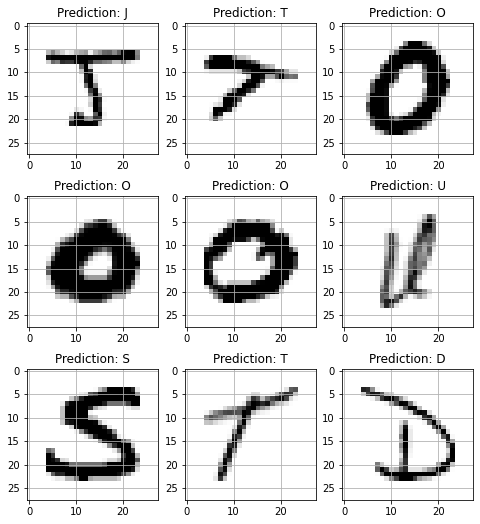

In [16]:
# Testing the model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()